<a href="https://colab.research.google.com/github/GuiSegabinassi/Dados_TESLA/blob/main/TESLA_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from plotly import graph_objs as go
import seaborn as sns
from datetime import date, timezone, datetime
import prophet
from prophet.plot import plot_plotly, plot_components_plotly



In [ ]:
df = pd.read_csv("TSLA.csv")

Neste primeiro DataFrame já podemos observar na coluna "Close" as diferenças nos preços de fechamento 

In [ ]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500
...,...,...,...,...,...,...,...
247,2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100
248,2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,305632100
249,2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800
250,2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196450300


In [ ]:
df.shape

(252, 7)

Visualizando o periodo da análise

In [ ]:
data_inicio = pd.to_datetime(df["Date"]).dt.date.min()
data_final = pd.to_datetime(df["Date"]).dt.date.max()
print(data_inicio)
print(data_final)

2022-02-01
2023-02-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
dados_duplicados = df[df.duplicated(keep = "first")]
print(dados_duplicados)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df["Close"].value_counts()

194.699997    2
310.416656    1
223.070007    1
300.799988    1
288.589996    1
             ..
241.866669    1
239.706665    1
232.229996    1
215.736664    1
177.279999    1
Name: Close, Length: 251, dtype: int64

Com um Describe podemos observar com mais clareza informações como, média, desvio padrão, valor maxima e valor minimo de fechamento

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,247.312513,253.390833,240.442368,246.678995,246.678995,9.502127e+07
std,62.960517,63.905626,61.858318,62.751403,62.751403,4.232011e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,4.186470e+07
25%,208.562496,218.968334,204.070004,210.784168,210.784168,6.702772e+07
50%,251.120002,256.956665,242.233330,250.101669,250.101669,8.411670e+07
75%,296.651672,302.244164,288.214173,293.431663,293.431663,1.025714e+08
max,378.766663,384.290009,362.433319,381.816681,381.816681,3.056321e+08


In [ ]:
def pegar_valores_online(TSLA):
  df = yf.download(TSLA)
  df.reset_index(inplace = True)
  return df

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df["Date"],
                         y = df["Close"],
                         name = "Preço de fechamento",
                         line_color = "red"))

fig.add_trace(go.Scatter(x=df["Date"],
y= df["Open"],
name="Preço abertura",
line_color="blue"))



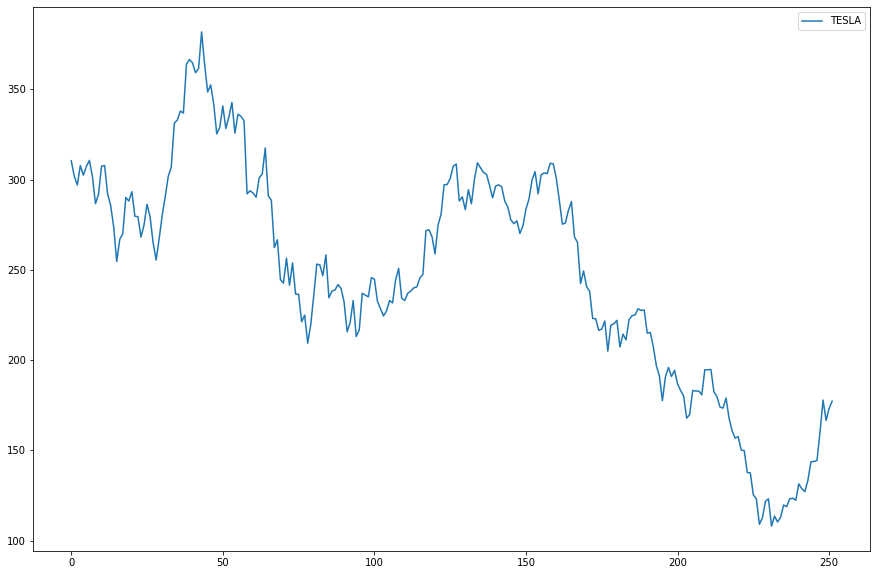

In [ ]:
df["Close"].plot(legend = True, label = "TESLA", figsize = (15,10))

In [ ]:
#média movel
df["MM7"] = df["Close"].rolling(7).mean()

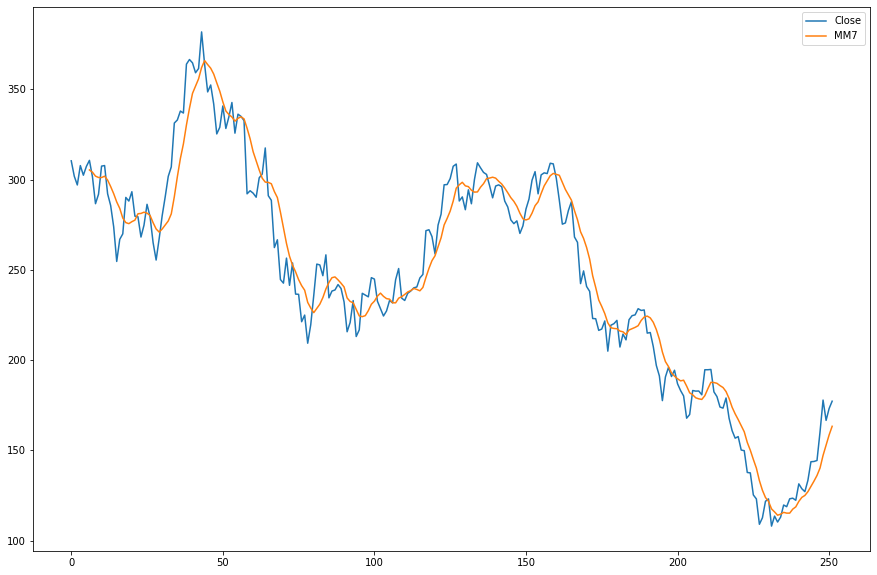

In [ ]:
#Gráfico de tendencia e média movel
df[["Close", "MM7"]].plot(legend = True, label = "TESLA", figsize = (15,10))

In [ ]:
#Médias moveis para (15, 30, 60)

dias = [15, 30, 60]
for dia in dias:
  df["MM" + str(dia)] = df["Close"].rolling(dia).mean()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MM7,MM15,MM30,MM60
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,NaN,NaN,NaN,NaN
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,NaN,NaN,NaN,NaN
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600,NaN,NaN,NaN,NaN
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,NaN,NaN,NaN,NaN
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
247,2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100,140.244284,129.626666,131.077999,160.370666
248,2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,305632100,147.261427,134.130666,131.642999,159.543333
249,2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800,152.902856,137.703999,131.971666,158.523999
250,2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196450300,158.588571,141.267333,132.489999,157.828000


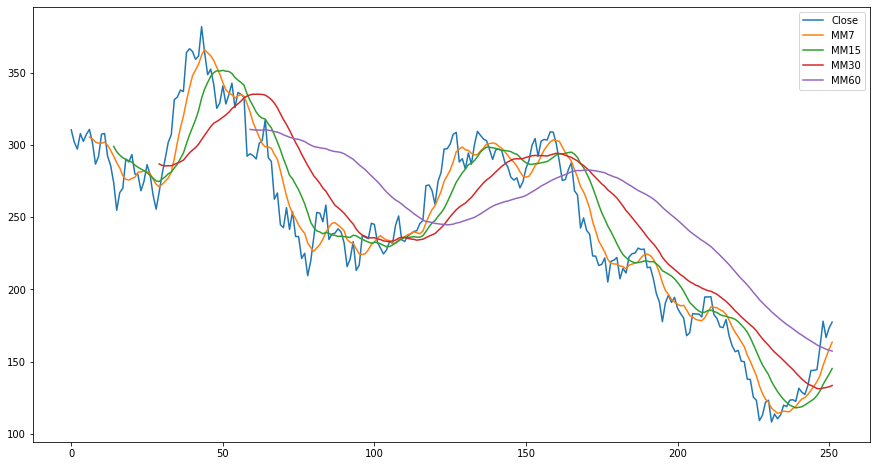

In [ ]:
df[["Close", "MM7", "MM15", "MM30", "MM60"]].plot(legend = True, label = "TESLA", figsize = (15,8))

In [ ]:
#Calculo de retorno diario
df["Retorno_diario"] = df["Close"].pct_change()

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MM7,MM15,MM30,MM60,Retorno_diario
0,2022-02-01,311.736664,314.566681,301.666656,310.416656,310.416656,73138200,NaN,NaN,NaN,NaN,NaN
1,2022-02-02,309.393341,310.500000,296.470001,301.886658,301.886658,66792900,NaN,NaN,NaN,NaN,-0.027479
2,2022-02-03,294.000000,312.333344,293.506653,297.046661,297.046661,78855600,NaN,NaN,NaN,NaN,-0.016032
3,2022-02-04,299.073334,312.166656,293.723328,307.773346,307.773346,73625400,NaN,NaN,NaN,NaN,0.036111
4,2022-02-07,307.929993,315.923340,300.903320,302.446655,302.446655,60994500,NaN,NaN,NaN,NaN,-0.017307
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-01-26,159.970001,161.419998,154.759995,160.270004,160.270004,234815100,140.244284,129.626666,131.077999,160.370666,0.109673
248,2023-01-27,162.429993,180.679993,161.169998,177.899994,177.899994,305632100,147.261427,134.130666,131.642999,159.543333,0.110002
249,2023-01-30,178.050003,179.770004,166.500000,166.660004,166.660004,230878800,152.902856,137.703999,131.971666,158.523999,-0.063182
250,2023-01-31,164.570007,174.300003,162.779999,173.220001,173.220001,196450300,158.588571,141.267333,132.489999,157.828000,0.039362


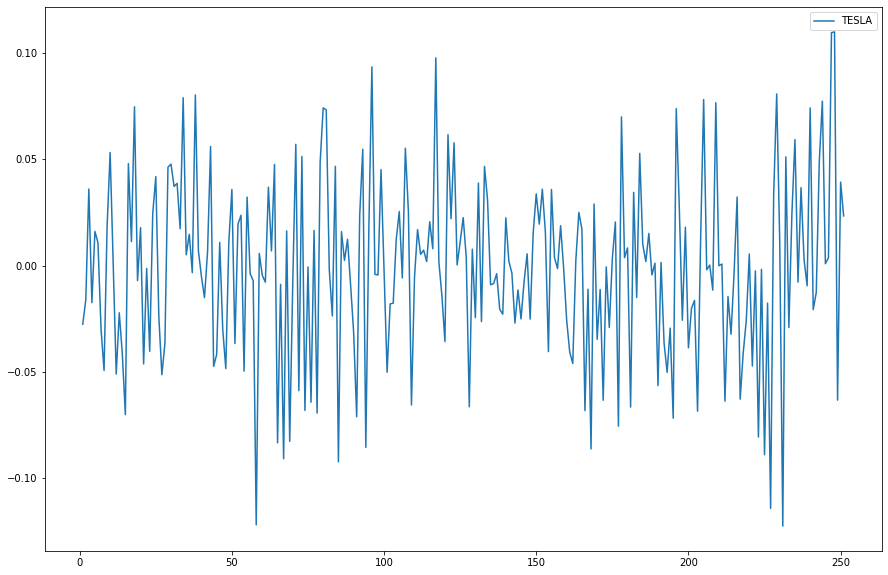

In [ ]:
#Grafico de retorno diario
df["Retorno_diario"].plot(legend = True, label = "TESLA", figsize = (15,10))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



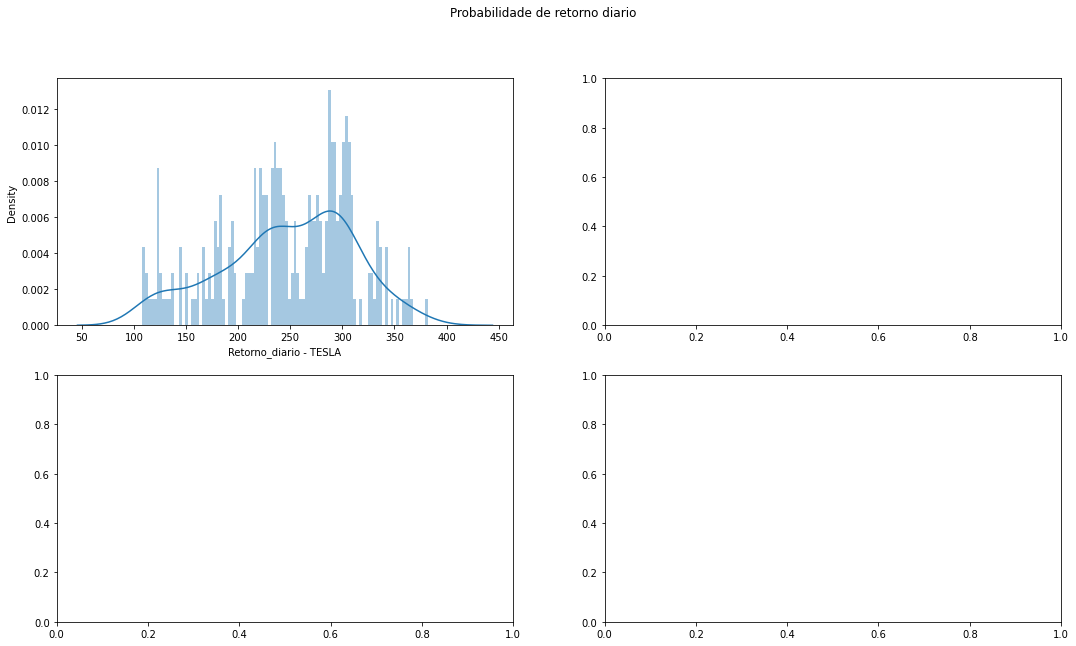

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (18,10))

fig.suptitle("Probabilidade de retorno diario")

sns.distplot(df["Close"], bins = 100, axlabel = "Retorno_diario - TESLA", ax=axes[0,0])

In [ ]:
#Retorno & Risco
retorno_tesla = df.Retorno_diario.dropna().mean()
risco_tesla = df.Retorno_diario.dropna().std()


In [ ]:
display("retorno_tesla", retorno_tesla, "risco_tesla", risco_tesla )

'retorno_tesla'

-0.0013263579674838875

'risco_tesla'

0.04242143825995245

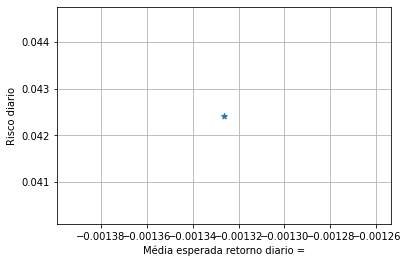

In [ ]:
plt.grid()
plt.xlabel("Média esperada retorno diario =")
plt.ylabel("Risco diario")
plt.scatter(retorno_tesla, risco_tesla, marker = "*")